In [2]:

import os
import numpy as np
from matplotlib import pyplot as plt

In [3]:
model_names = ['VGG', 'Inception3', 'ResNet'] 


In [4]:
distortions = [
    'gaussian_noise', 
    'shot_noise', 
    'impulse_noise',
    'defocus_blur', 
    'glass_blur', 
    'motion_blur', 
    'zoom_blur',
    'snow', 
    'frost', 
    'fog', 
    'brightness',
    'contrast', 
    'elastic_transform', 
#     'pixelate', 
    'jpeg_compression',
]


In [5]:
res_top1_all = np.zeros((113,len(distortions), 3, len(model_names)))
res_top5_all = np.zeros((113,len(distortions), 3, len(model_names)))

res_top1 = np.zeros((len(distortions), 3, len(model_names)))
res_top5 = np.zeros((len(distortions), 3, len(model_names)))
for didx, d in enumerate(distortions):
    print(d)
    for severity in range(1,5):
        print(severity)
        for midx, m in enumerate(model_names):
            txtfile = d + '_' + str(severity) + '_' + m + '.txt'
            with open(os.path.join('./outputs_robust/', txtfile)) as f:
                lines = f.readlines()      
            top1, top5 = [], []
            lno = 0
            for line in lines:
                if 'top 1' in line:
#                     print(line)
#                     import pdb; pdb.set_trace()          
                    loc = line.index('top 1')
                    top1.append(float(line[loc+7:loc+12]))
                    loc = line.index('top 5')
                    top5.append(float(line[loc+7:loc+12]))
                    res_top1_all[lno, didx, severity-1, midx] =  top1[-1]
                    res_top5_all[lno, didx, severity-1, midx] =  top5[-1]
                    lno+=1
            
            res_top1[didx, severity-1, midx] =  sum(top1)/len(top1)
            res_top5[didx, severity-1, midx] =  sum(top5)/len(top5)            
#                 boxes = [line.strip() for line in f.readlines()]    
    
    
#     idx = data.index(m + '\n') # only for resNet
#     top_1, top_5 = [], []
#     for j in range(113):



gaussian_noise
1


IndexError: index 113 is out of bounds for axis 0 with size 113

In [231]:
lno

119

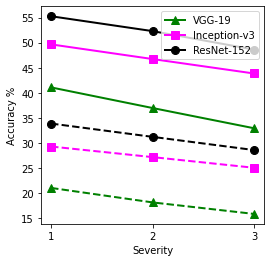

In [331]:
model_names = ['VGG', 'Inception3', 'ResNet',]
model_tick = ['VGG-19', 'Inception-v3','ResNet-152']
colors = ['green', 'magenta', 'black']

symbs = ['^', 's', 'o']

fig = plt.figure(figsize=[4, 4])

res5 = res_top5.mean(axis=0).T
res1 = res_top1.mean(axis=0).T

for tx, x in enumerate(res5):        
    plt.plot(x, '-', marker=symbs[tx], color=colors[tx], linewidth=2, markersize= 8)

for tx, x in enumerate(res1):        
    plt.plot(x, '--', marker=symbs[tx], color=colors[tx], linewidth=2, markersize= 8)
    
    
#     plt.plot(scores[:,1], '--', marker='o', color=colors[ti], linewidth=4, markersize= 13)
    
plt.xticks([ 0, 1, 2], [ 1, 2, 3])    
plt.legend(model_tick)
plt.ylabel('Accuracy %')
plt.xlabel('Severity')
# plt.grid(axis='y')
plt.show()
# fig.savefig('../figs/ourRes.png') 


In [188]:
res_top1.shape

(14, 3, 3)

In [189]:
res_top1.mean(axis=0)

array([[1.08091024, 1.8204804 , 2.25663717],
       [0.67635904, 1.42857143, 1.70670038],
       [0.52696494, 0.56890013, 0.60050569]])

In [112]:
res_top1.shape

(15, 3, 3)

In [120]:
# res_top1

/Users/ali/miniconda3/envs/objNet/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/Users/ali/miniconda3/envs/objNet/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/Users/ali/miniconda3/envs/objNet/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/Users/ali/miniconda3/envs/objNet/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally i

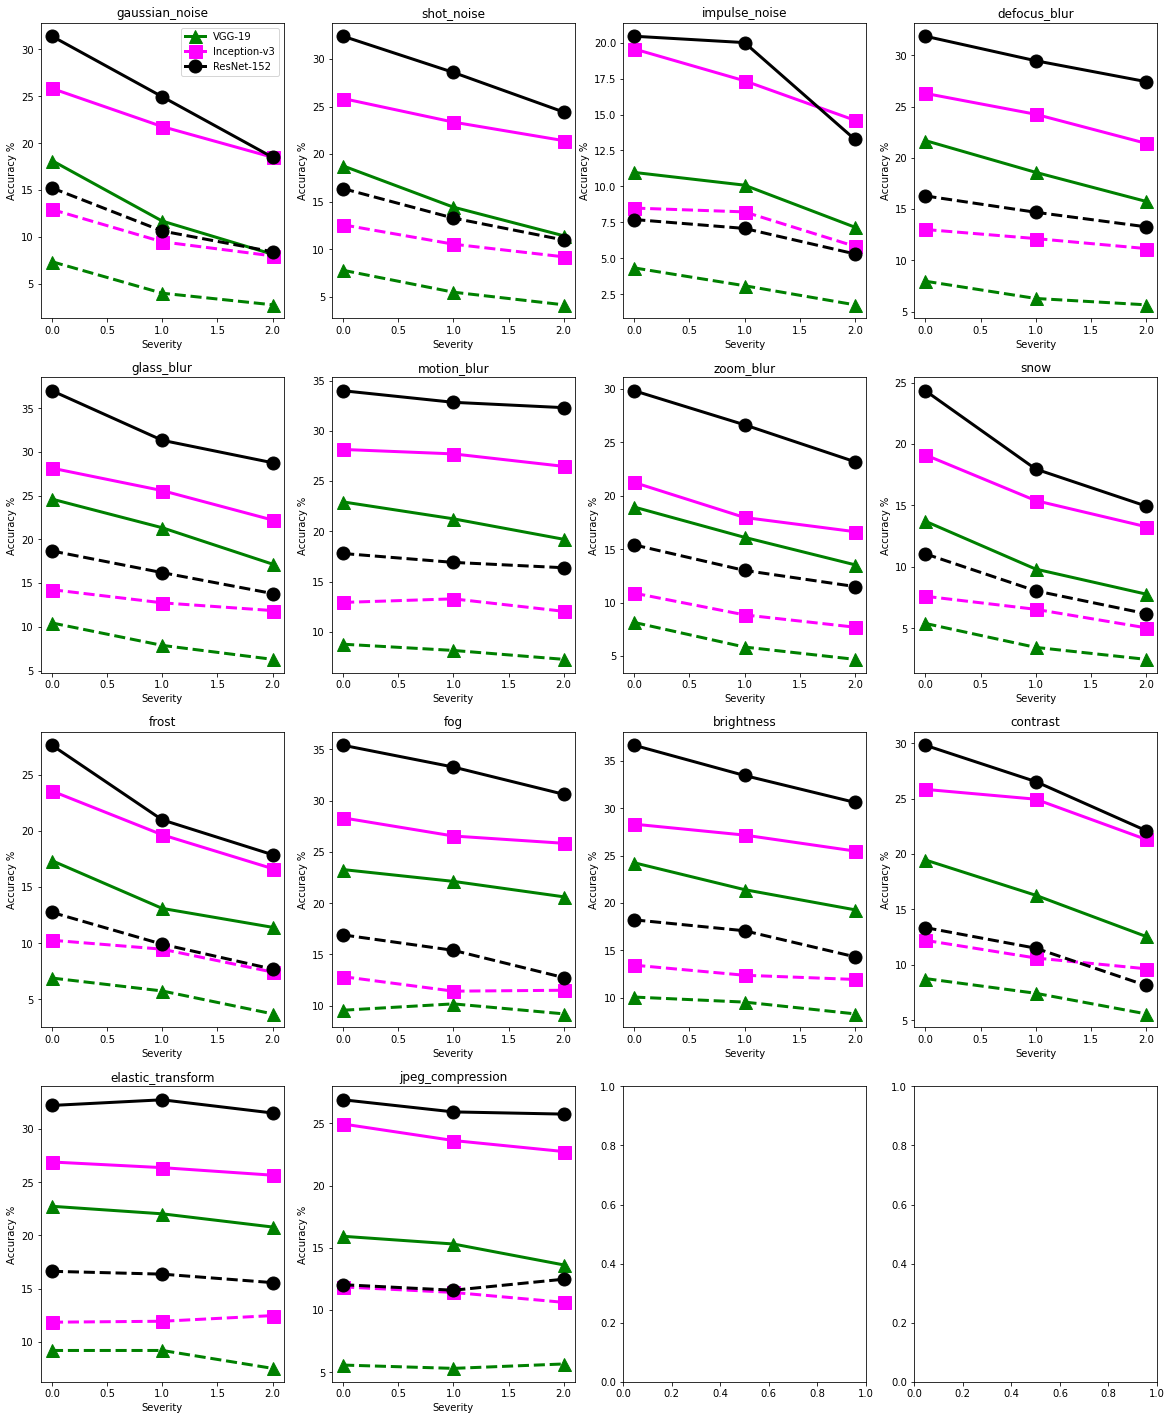

In [333]:
fig, axs = plt.subplots(4,4, figsize=(20,25))

model_names = ['VGG', 'Inception3', 'ResNet',]
model_tick = ['VGG-19', 'Inception-v3','ResNet-152']
colors = ['green', 'magenta', 'black']

symbs = ['^', 's', 'o']


cnt = 0 
for i in range(1,5):
    for j in range(1,5): 
        if cnt >= 14: break
            
#         if cnt== 13: 
#             cnt= 14
#             continue
            
#         if cnt==14:
#             j -= 1
            
        
        for tx, x in enumerate(res_top5[cnt].T):        
            axs[i-1,j-1].plot(x, '-', marker=symbs[tx], color=colors[tx], linewidth=3, markersize= 13)        
            
        for tx, x in enumerate(res_top1[cnt].T):        
            axs[i-1,j-1].plot(x, '--', marker=symbs[tx], color=colors[tx], linewidth=3, markersize= 13)        
        
#     axs[i].subplot(res_top5)    
#     axs[i].set_xticks([])
#     axs[i].set_yticks([])
        axs[i-1,j-1].set_title( f'{distortions[cnt]}')
        cnt += 1
        
        axs[i-1,j-1].set_xticks([ 0, 1, 2], [ 1, 2, 3])    
        if cnt == 1: 
            axs[i-1,j-1].legend(model_tick)
        axs[i-1,j-1].set_ylabel('Accuracy %')
        axs[i-1,j-1].set_xlabel('Severity')
#         axs[i-1,j-1].set_grid(axis='y')
#         plt.show()


plt.show()
fig.tight_layout()
# fig.savefig('../figs/samples/' + category + '-  wrong-bad.png')



In [153]:
# res_top5[cnt]

In [166]:
res_top5.shape

(15, 3, 3)

# Scatter plot

In [233]:
res_top1_all.shape

(113, 14, 3, 3)

In [335]:
mean_full_top1 = res_top1_all.mean(axis=1).mean(axis=1).mean(axis=1)
mean_full_models_top1 = res_top1.mean(axis=1).mean(axis=1)
mean_full_top5 = res_top5_all.mean(axis=1).mean(axis=1).mean(axis=1)
mean_full_models_top5 = res_top5.mean(axis=1).mean(axis=1)

In [278]:
# rerun with box first and then 

In [337]:
mean_box_top1 = res_top1_all.mean(axis=1).mean(axis=1).mean(axis=1)
mean_box_models_top1 = res_top1.mean(axis=1).mean(axis=1)
mean_box_top5 = res_top5_all.mean(axis=1).mean(axis=1).mean(axis=1)
mean_box_models_top5 = res_top5.mean(axis=1).mean(axis=1)

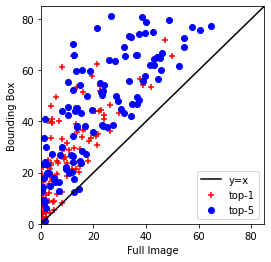

In [340]:
fig = plt.figure(figsize=[4, 4])
plt.scatter(mean_full_top1, mean_box_top1,marker='+', color='r')
plt.scatter(mean_full_top5, mean_box_top5,marker='o', color='b')
plt.plot(np.arange(0,87), np.arange(0,87), color='black')
plt.legend(['y=x', 'top-1', 'top-5'])
plt.xlim([0,85])
plt.ylim([0,85])
plt.xlabel('Full Image')
plt.ylabel('Bounding Box')
plt.yticks([0,20,40,60,80])
plt.show()

In [274]:
mean_full_top5

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

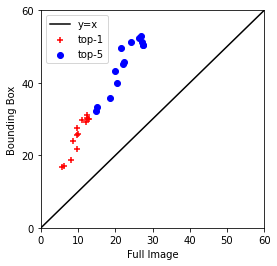

In [341]:
fig = plt.figure(figsize=[4, 4])
plt.scatter(mean_full_models_top1, mean_box_models_top1,marker='+', color='r')
plt.scatter(mean_full_models_top5, mean_box_models_top5,marker='o', color='b')
plt.plot(np.arange(0,63), np.arange(0,63), color='black')
plt.legend(['y=x', 'top-1', 'top-5'])
plt.xlim([0,60])
plt.ylim([0,60])
plt.xlabel('Full Image')
plt.ylabel('Bounding Box')
plt.yticks([0,20,40,60])

plt.show()

In [347]:
res_top1_box = res_top1_all
res_top5_box = res_top5_all

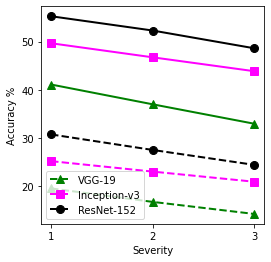

In [353]:
model_names = ['VGG', 'Inception3', 'ResNet',]
model_tick = ['VGG-19', 'Inception-v3','ResNet-152']
colors = ['green', 'magenta', 'black']

symbs = ['^', 's', 'o']

fig = plt.figure(figsize=[4, 4])

res5_full = res_top5_all.mean(axis=0).mean(axis=0).T
res5_box = res_top5_box.mean(axis=0).mean(axis=0).T

for tx, x in enumerate(res5_full):        
    plt.plot(x, '--', marker=symbs[tx], color=colors[tx], linewidth=2, markersize= 8)

for tx, x in enumerate(res5_box):        
    plt.plot(x, '-', marker=symbs[tx], color=colors[tx], linewidth=2, markersize= 8)
    
    
#     plt.plot(scores[:,1], '--', marker='o', color=colors[ti], linewidth=4, markersize= 13)
    
plt.xticks([ 0, 1, 2], [ 1, 2, 3])    
plt.legend(model_tick)
plt.ylabel('Accuracy %')
plt.xlabel('Severity')
# plt.grid(axis='y')
plt.show()
# fig.savefig('../figs/ourRes.png') 


In [350]:
res_top1_all.shape

(113, 14, 3, 3)